# Análise de Medicamentos EMS - Dashboard Interativo

## Objetivo da Análise

Desenvolver uma análise completa dos medicamentos da EMS (empresa da região de Hortolândia/SP) presentes na base de dados da ANVISA, explorando preços, tipos de produtos e estratégias de mercado.

---

## Bloco 1 - Setup e Carregamento dos Dados Limpos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

# Configuração visual dos gráficos
plt.style.use('default')
sns.set_palette("husl")

# Carregamento dos dados já tratados
print("Carregando dados limpos de medicamentos...")
medicamentos = pd.read_csv('data/medicamentos_limpos.csv')

print(f"Dataset carregado com sucesso!")
print(f"Total de registros: {len(medicamentos):,}")
print(f"Laboratórios únicos: {medicamentos['laboratorio'].nunique():,}")
print(f"Medicamentos únicos: {medicamentos['produto'].nunique():,}")

# Preview dos dados
print(f"\nPrimeiros registros:")
medicamentos.head(3)

Carregando dados limpos de medicamentos...
Dataset carregado com sucesso!
Total de registros: 26,775
Laboratórios únicos: 259
Medicamentos únicos: 6,100

Primeiros registros:


,ativo,CNPJ,laboratorio,registro,EAN 1,EAN 2,EAN 3,produto,apresentacao,classe_terapeutica,...,PF 22 % ALC,"PF 22,5 %","PF 22,5 % ALC",PF 23 %,PF 23 % ALC,restricao_hospitalar,comercializavel,tarja,DESTINAÇÃO COMERCIAL,PREÇO FINAL CONSUMIDOR
0,21-ACETATO DE DEXAMETASONA;CLOTRIMAZOL,18.459.628/0001-15,BAYER S.A.,1705600230032,7891106000956,-,-,BAYCUTEN N,"10 MG/G + 0,443 MG/G CREM DERM CT BG AL X 40 G",D7B2 - CORTICOESTERÓIDES ASSOCIADOS A ANTIMICO...,...,"34,33","38,70","34,55","38,95","34,78",False,True,Sem Tarja,NaN,49.06
1,ABATACEPTE,56.998.982/0001-07,BRISTOL-MYERS SQUIBB FARMACÊUTICA LTDA,1018003900019,7896016806469,-,-,ORENCIA,250 MG PO LIOF SOL INJ CT 1 FA + SER DESCARTÁVEL,M1C - AGENTES ANTI-REUMÁTICOS ESPECÍFICOS,...,"2659,95","2677,11","2677,11","2694,49","2694,49",True,True,Tarja Vermelha,NaN,NaN
2,ABATACEPTE,56.998.982/0001-07,BRISTOL-MYERS SQUIBB FARMACÊUTICA LTDA,1018003900078,7896016808197,-,-,ORENCIA,125 MG/ML SOL INJ SC CT 4 SER PREENC VD TRANS ...,M1C - AGENTES ANTI-REUMÁTICOS ESPECÍFICOS,...,"8446,83","8501,33","8501,33","8556,53","8556,53",False,True,Sem Tarja,NaN,11107.63


Nesta etapa utilizaremos nosso aquivo .csv com colunas e linhas normalizados visando suprir nossa necessidade de responder perguntas através da plotagem de gráficos.

---

## Bloco 2 - Análise Geral do Mercado Farmacêutico

PANORAMA GERAL DO MERCADO FARMACÊUTICO BRASILEIRO
Distribuição de medicamentos por classificação de tarja:
tarja
Tarja Vermelha                  13600
Sem Tarja                        7281
Tarja Vermelha sob restrição     5142
Tarja Preta                       752
Name: count, dtype: int64


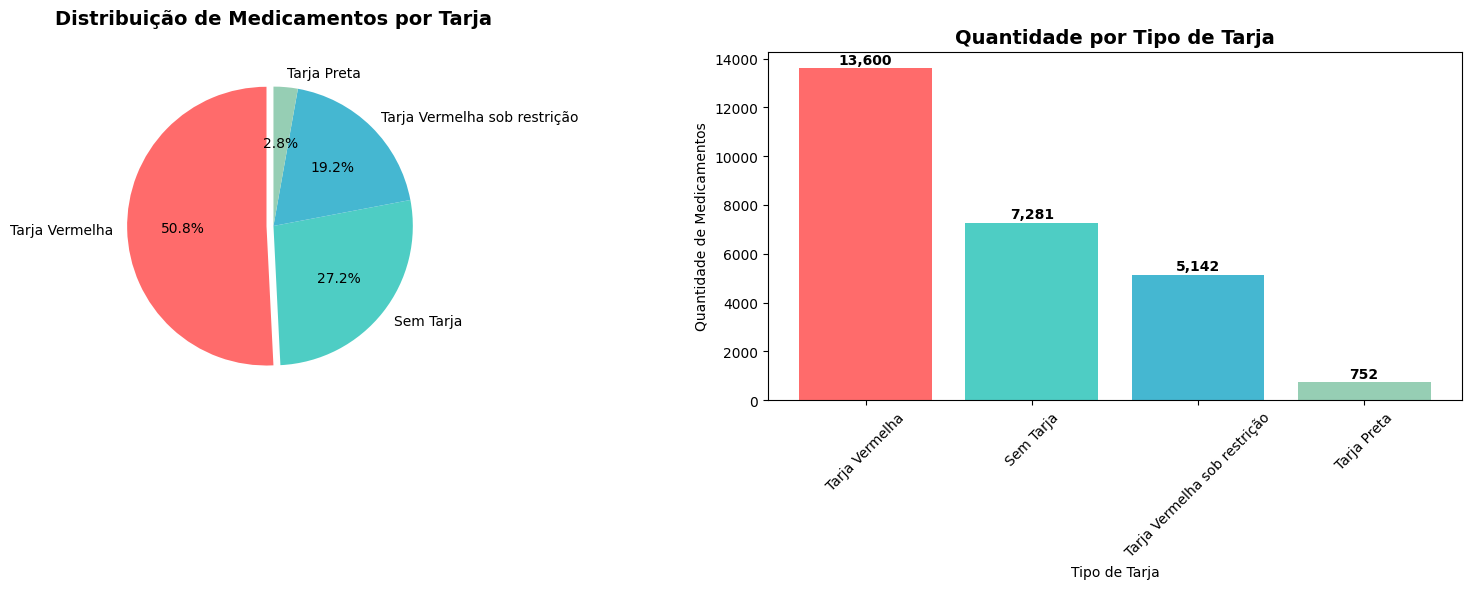


Insights Regulatórios:
   🔴 Tarja Vermelha representa 50.8% do mercado
   🟡 Tarja Amarela representa 0.0% do mercado
   ⚪ Sem Tarja representa 27.2% do mercado


In [3]:
print("PANORAMA GERAL DO MERCADO FARMACÊUTICO BRASILEIRO")
print("="*60)

# 1. Distribuição por Tarja (Análise Regulatória)
print("Distribuição de medicamentos por classificação de tarja:")
distribuicao_tarja = medicamentos['tarja'].value_counts()
print(distribuicao_tarja)


# Visualização: Pizza da distribuição por tarja
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


# Gráfico de Pizza
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
wedges, texts, autotexts = ax1.pie(
    distribuicao_tarja.values, 
    labels=distribuicao_tarja.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=[0.05 if x == distribuicao_tarja.max() else 0 for x in distribuicao_tarja.values]
)

ax1.set_title('Distribuição de Medicamentos por Tarja', fontsize=14, fontweight='bold', pad=20)


# Gráfico de Barras para melhor comparação
bars = ax2.bar(distribuicao_tarja.index, distribuicao_tarja.values, color=colors)
ax2.set_title('Quantidade por Tipo de Tarja', fontsize=14, fontweight='bold')
ax2.set_xlabel('Tipo de Tarja')
ax2.set_ylabel('Quantidade de Medicamentos')
ax2.tick_params(axis='x', rotation=45)


# Adicionando valores nas barras
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


# Insights da análise geral
print(f"\nInsights Regulatórios:")
print(f"   🔴 Tarja Vermelha representa {(distribuicao_tarja.get('Tarja Vermelha', 0)/len(medicamentos)*100):.1f}% do mercado")
print(f"   🟡 Tarja Amarela representa {(distribuicao_tarja.get('Tarja Amarela', 0)/len(medicamentos)*100):.1f}% do mercado")
print(f"   ⚪ Sem Tarja representa {(distribuicao_tarja.get('Sem Tarja', 0)/len(medicamentos)*100):.1f}% do mercado")

---

## Bloco 3 - Análise de Preços por Tipo de Produto


ANÁLISE DE PREÇOS POR CATEGORIA DE PRODUTO
Estatísticas de Preços por Tipo de Produto:
                             count     mean   median       std    min  \
tipo_produto                                                            
Biológico                     1029  9769.69  1583.82  33348.43  16.15   
Específico                    1434   253.70    96.68    579.67   1.77   
Fitoterápico                   356   125.00    70.29    241.81  10.22   
Genérico                      8506  1305.49    93.34  46542.61   1.99   
Novo                          3516  5666.25   136.33  30731.00   3.19   
Não Informado                   52  4261.22   193.86  17699.56  37.99   
Produto de Terapia Avançada      0      NaN      NaN       NaN    NaN   
Radiofármaco                     0      NaN      NaN       NaN    NaN   
Similar                       7826   775.16   102.08   4090.14   2.00   

                                    max  
tipo_produto                             
Biológico               

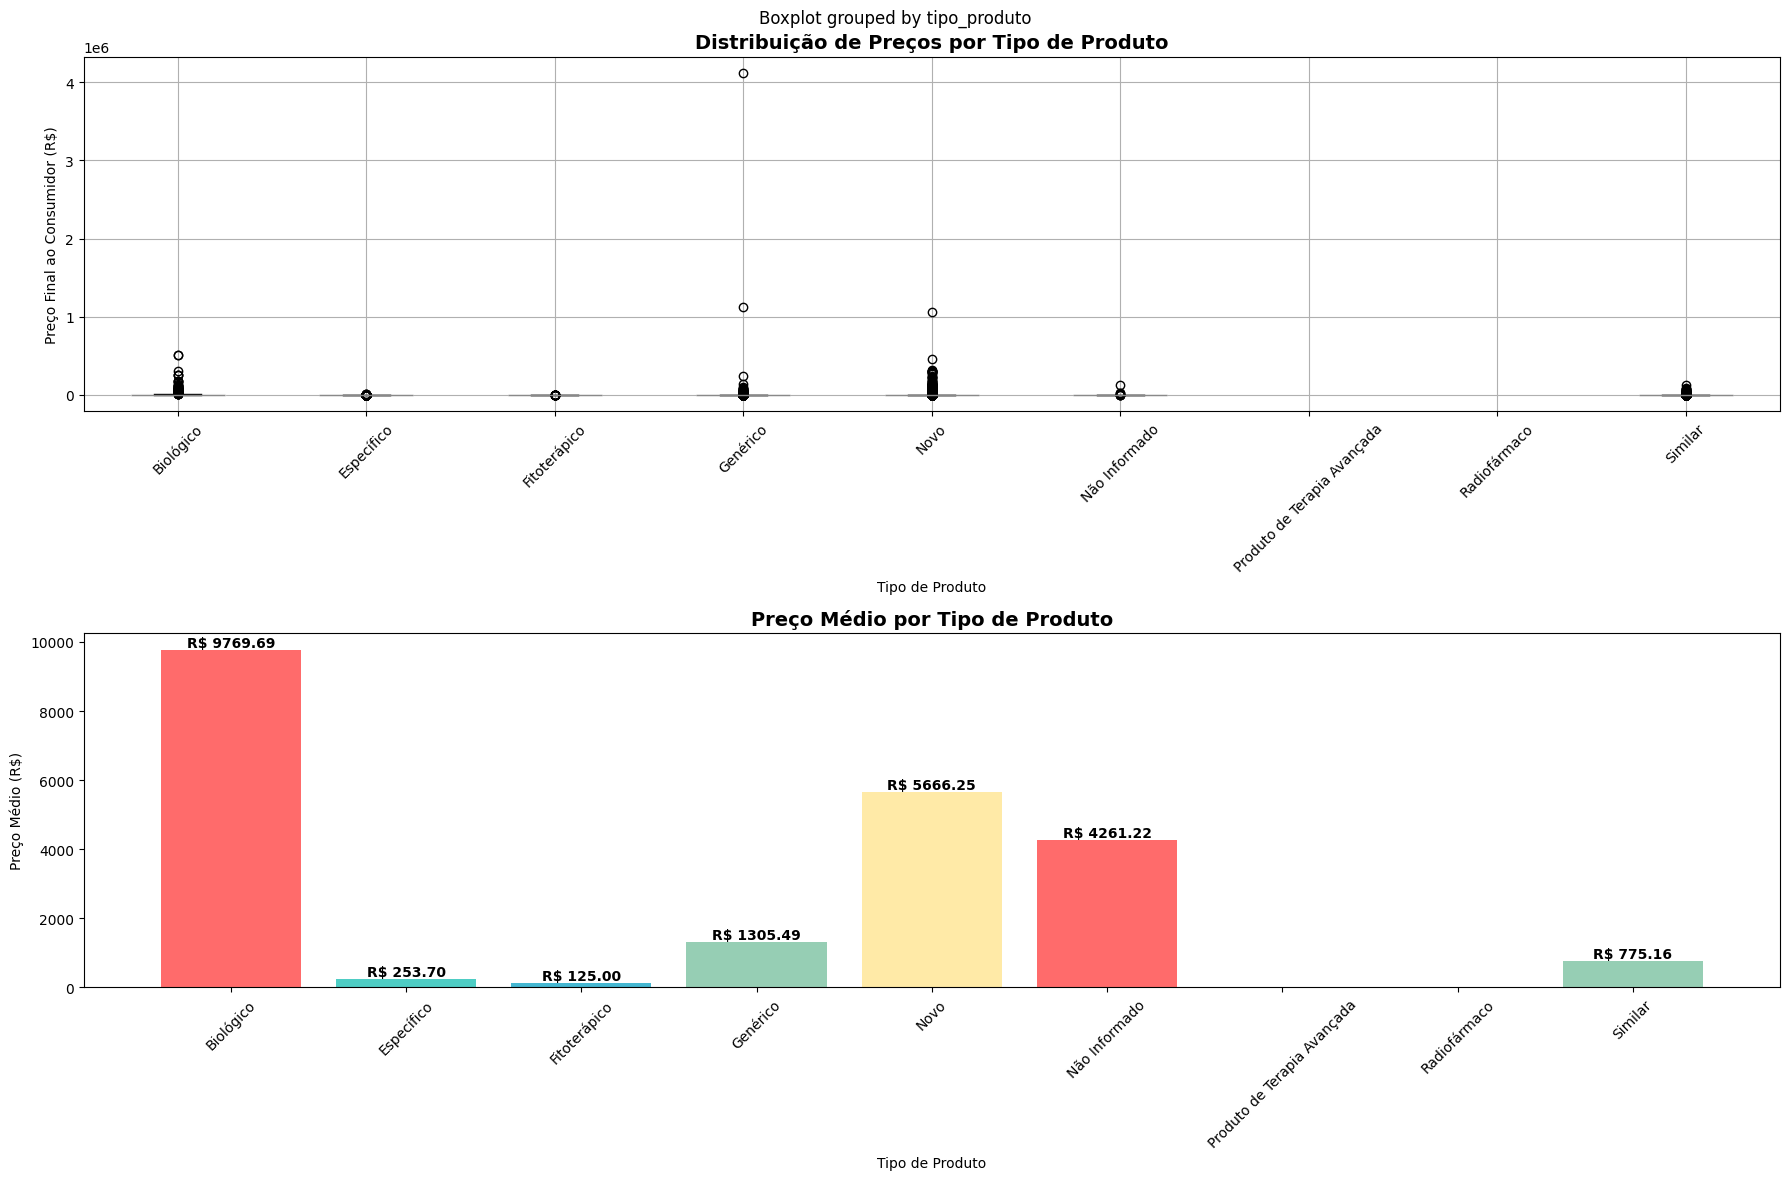


💡 Insights de Precificação:
Categoria mais cara: Biológico (R$ 9769.69)
Categoria mais barata: Fitoterápico (R$ 125.00)
Diferença de preço: 7715.8%


In [ ]:
print("\nANÁLISE DE PREÇOS POR CATEGORIA DE PRODUTO")
print("="*50)

# Análise de preços por tipo de produto
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))


# Boxplot detalhado
medicamentos.boxplot(
    column='PREÇO FINAL CONSUMIDOR',
    by='tipo_produto',
    ax=ax1,
    grid=True,
    patch_artist=True
)

ax1.set_title('Distribuição de Preços por Tipo de Produto', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tipo de Produto')
ax1.set_ylabel('Preço Final ao Consumidor (R$)')
ax1.tick_params(axis='x', rotation=45)


# Estatísticas por tipo de produto
stats_produtos = medicamentos.groupby('tipo_produto')['PREÇO FINAL CONSUMIDOR'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

print("Estatísticas de Preços por Tipo de Produto:")
print(stats_produtos)


# Gráfico de barras com preços médios
ax2.bar(stats_produtos.index, stats_produtos['mean'], 
        color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'][:len(stats_produtos)])
ax2.set_title('Preço Médio por Tipo de Produto', fontsize=14, fontweight='bold')
ax2.set_xlabel('Tipo de Produto')
ax2.set_ylabel('Preço Médio (R$)')
ax2.tick_params(axis='x', rotation=45)


# Adicionando valores nas barras
for i, (idx, row) in enumerate(stats_produtos.iterrows()):
    ax2.text(i, row['mean'] + 1, f'R$ {row["mean"]:.2f}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


# Insights de preços
produto_mais_caro = stats_produtos['mean'].idxmax()
produto_mais_barato = stats_produtos['mean'].idxmin()

print(f"\nInsights de Precificação:")
print(f"Categoria mais cara: {produto_mais_caro} (R$ {stats_produtos.loc[produto_mais_caro, 'mean']:.2f})")
print(f"Categoria mais barata: {produto_mais_barato} (R$ {stats_produtos.loc[produto_mais_barato, 'mean']:.2f})")
print(f"Diferença de preço: {((stats_produtos.loc[produto_mais_caro, 'mean'] / stats_produtos.loc[produto_mais_barato, 'mean'] - 1) * 100):.1f}%")

apply / mean / agg

---

## Bloco 4 - Foco na EMS: Identificação e Segmentação

**Análise de Participação e Estrutura Corporativa**

In [5]:
# Para o exercício de análise e plotagem decidi implementar entorno dos laboratórios EMS (Região de Hortolândia),
# que persistem na base de dados como 'EMS S/A' e 'EMS SIGMA PHARMA LTDA'.
print("\nANÁLISE FOCADA: LABORATÓRIOS EMS")
print("="*40)


# Criação do filtro EMS (mantendo sua lógica original)
print("\nFiltrando para EMS na base de dados...")
laboratorios_ems = (medicamentos['laboratorio'] == 'EMS S/A') | (medicamentos['laboratorio'] == 'EMS SIGMA PHARMA LTDA')
ems = medicamentos[laboratorios_ems].copy()


# Obtendo dados após filtragem
print(f"\nResumo EMS:")
print(f"Total de medicamentos EMS: {len(ems):,}")
print(f"Participação no mercado: {(len(ems)/len(medicamentos)*100):.2f}%")
print(f"Subsidiárias analisadas: {ems['laboratorio'].nunique()}")


# Distribuição entre as subsidiárias EMS
distribuicao_ems = ems['laboratorio'].value_counts()
print(f"\nDistribuição entre subsidiárias EMS:")
for lab, qtd in distribuicao_ems.items():
    print(f"{lab}: {qtd:,} produtos ({qtd/len(ems)*100:.1f}%)")


ANÁLISE FOCADA: LABORATÓRIOS EMS

Filtrando para EMS na base de dados...

Resumo EMS:
Total de medicamentos EMS: 2,103
Participação no mercado: 7.85%
Subsidiárias analisadas: 2

Distribuição entre subsidiárias EMS:
EMS S/A: 1,727 produtos (82.1%)
EMS SIGMA PHARMA LTDA: 376 produtos (17.9%)


---

**Análise de Especialização por Categoria**

In [8]:
print("ANÁLISE DE ESPECIALIZAÇÃO: DESCOBERTAS ESTRATÉGICAS")
print("="*55)

precos_por_categoria = ems.groupby(['tipo_produto', 'laboratorio'])['PREÇO FINAL CONSUMIDOR'].mean()
print("Preços médios por categoria e subsidiária:")
print(precos_por_categoria)

print(f"\nDESCOBERTAS ESTRATÉGICAS:")


# Analisando sua descoberta sobre Biológicos
biologicos_ems = ems[ems['tipo_produto'] == 'Biológico']
print(f"\nBIOLÓGICOS - EXCLUSIVIDADE EMS S/A:")
print(f"Quantidade: {len(biologicos_ems)} produtos")
print(f"Preço médio: R$ {biologicos_ems['PREÇO FINAL CONSUMIDOR'].mean():.2f}")
# print(f"ESTRATÉGIA: EMS S/A mantém exclusividade em alta tecnologia")

ANÁLISE DE ESPECIALIZAÇÃO: DESCOBERTAS ESTRATÉGICAS
Preços médios por categoria e subsidiária:
tipo_produto   laboratorio          
Biológico      EMS S/A                   252.022500
Específico     EMS S/A                   360.489545
               EMS SIGMA PHARMA LTDA     361.327949
Fitoterápico   EMS S/A                    73.630000
               EMS SIGMA PHARMA LTDA      96.305000
Genérico       EMS S/A                   395.974090
               EMS SIGMA PHARMA LTDA     121.886667
Novo           EMS S/A                   458.032344
               EMS SIGMA PHARMA LTDA     146.105789
Não Informado  EMS SIGMA PHARMA LTDA      95.832000
Similar        EMS S/A                  1372.115959
               EMS SIGMA PHARMA LTDA     201.761857
Name: PREÇO FINAL CONSUMIDOR, dtype: float64

DESCOBERTAS ESTRATÉGICAS:

BIOLÓGICOS - EXCLUSIVIDADE EMS S/A:
Quantidade: 20 produtos
Preço médio: R$ 252.02


---

## Bloco 5 - Visualização Melhorada

**Múltiplas visualizações complementares**

VISUALIZAÇÕES MELHORADAS COM CLAUDE PARA ANÁLISE DE ESPECIALIZAÇÃO


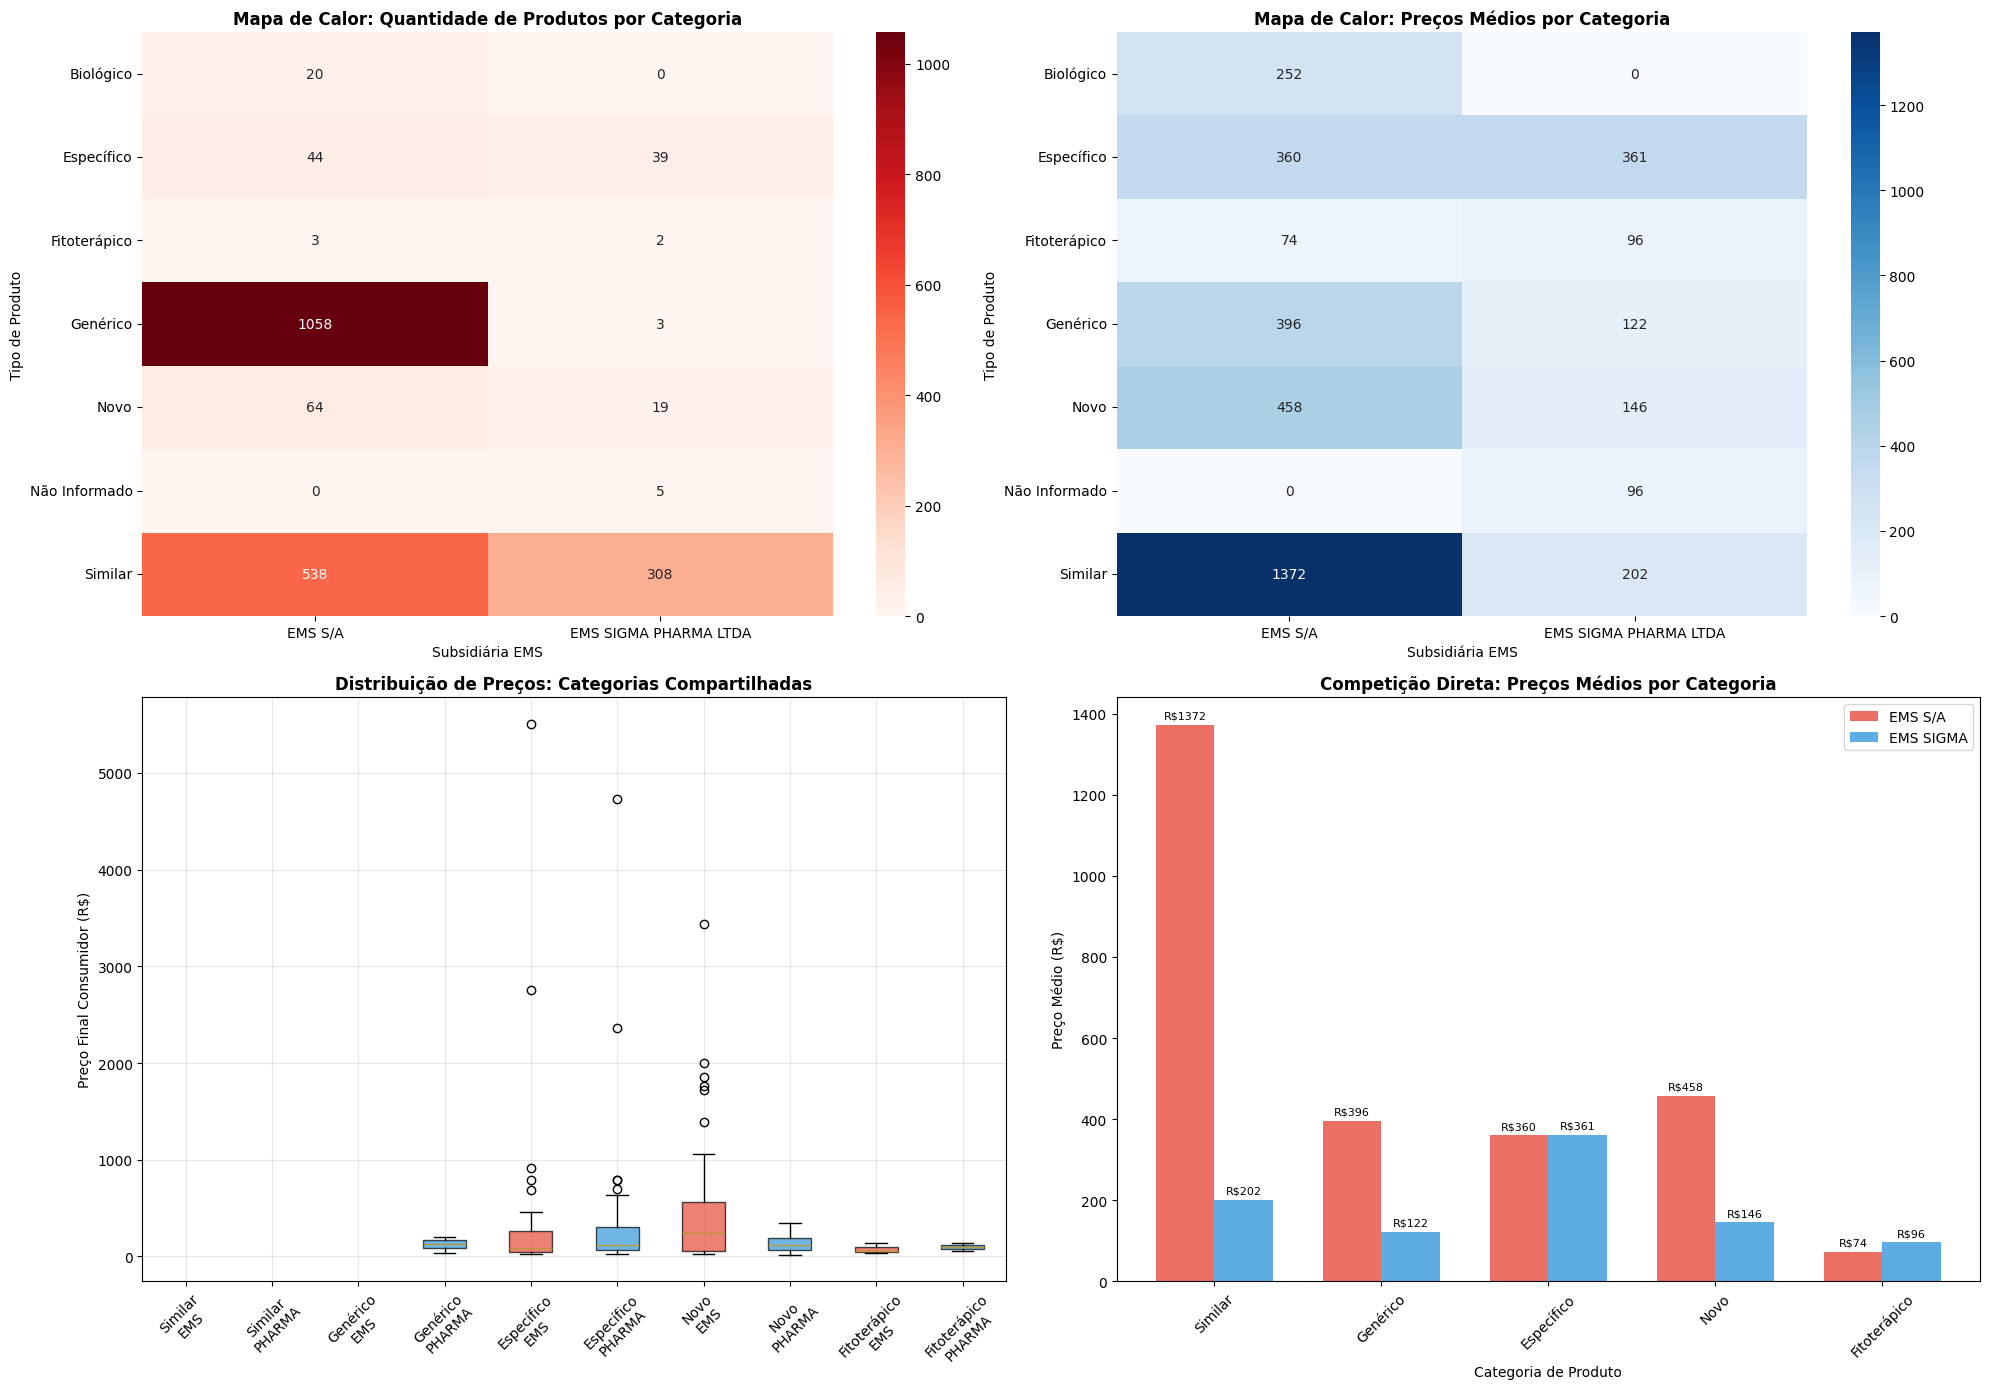


CONCLUSÕES DA ANÁLISE DE ESPECIALIZAÇÃO:
EMS S/A: Foca em alta tecnologia (Biológicos) e volume
EMS SIGMA: Estratégia de nicho com preços mais competitivos
Complementaridade: Subsidiárias não competem diretamente


In [11]:
print("VISUALIZAÇÕES MELHORADAS COM CLAUDE PARA ANÁLISE DE ESPECIALIZAÇÃO")
print("="*55)

# Preparando dados para visualizações mais claras
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))

# VISUALIZAÇÃO 1: Heatmap de especialização (NOVA)
pivot_qtd = ems.pivot_table(values='produto', index='tipo_produto', 
                           columns='laboratorio', aggfunc='count', fill_value=0)

sns.heatmap(pivot_qtd, annot=True, fmt='d', cmap='Reds', ax=ax1)
ax1.set_title('Mapa de Calor: Quantidade de Produtos por Categoria', fontweight='bold')
ax1.set_xlabel('Subsidiária EMS')
ax1.set_ylabel('Tipo de Produto')

# VISUALIZAÇÃO 2: Heatmap de preços médios (NOVA)
pivot_precos = ems.pivot_table(values='PREÇO FINAL CONSUMIDOR', index='tipo_produto', 
                              columns='laboratorio', aggfunc='mean', fill_value=0)

sns.heatmap(pivot_precos, annot=True, fmt='.0f', cmap='Blues', ax=ax2)
ax2.set_title('Mapa de Calor: Preços Médios por Categoria', fontweight='bold')
ax2.set_xlabel('Subsidiária EMS')
ax2.set_ylabel('Tipo de Produto')

# VISUALIZAÇÃO 3: Seu boxplot original - MELHORADO
# Separando por categoria para melhor leitura
categorias_ambas = []
for tipo in ems['tipo_produto'].unique():
    dados_tipo = ems[ems['tipo_produto'] == tipo]
    if dados_tipo['laboratorio'].nunique() > 1:  # Apenas categorias com ambas subsidiárias
        categorias_ambas.append(tipo)

if categorias_ambas:
    dados_comparacao = ems[ems['tipo_produto'].isin(categorias_ambas)]
    
    # Criando boxplot mais legível
    box_data = []
    labels = []
    
    for tipo in categorias_ambas:
        for lab in ['EMS S/A', 'EMS SIGMA PHARMA LTDA']:
            subset = dados_comparacao[
                (dados_comparacao['tipo_produto'] == tipo) & 
                (dados_comparacao['laboratorio'] == lab)
            ]['PREÇO FINAL CONSUMIDOR']
            
            if not subset.empty:
                box_data.append(subset.values)
                labels.append(f"{tipo}\n{lab.split()[-2]}")  # Nome mais curto
    
    if box_data:
        bp = ax3.boxplot(box_data, labels=labels, patch_artist=True)
        
        # Colorindo as caixas alternadamente
        colors = ['#E74C3C', '#3498DB'] * len(categorias_ambas)
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        ax3.set_title('Distribuição de Preços: Categorias Compartilhadas', fontweight='bold')
        ax3.set_ylabel('Preço Final Consumidor (R$)')
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(True, alpha=0.3)

# VISUALIZAÇÃO 4: Gráfico de barras comparativo (NOVA)
# Mostrando apenas categorias onde ambas subsidiárias competem
dados_comparacao_resumo = []
for tipo in categorias_ambas:
    for lab in ['EMS S/A', 'EMS SIGMA PHARMA LTDA']:
        subset = ems[(ems['tipo_produto'] == tipo) & (ems['laboratorio'] == lab)]
        if not subset.empty:
            dados_comparacao_resumo.append({
                'Categoria': tipo,
                'Subsidiária': 'S/A' if 'S/A' in lab else 'SIGMA',
                'Preço_Médio': subset['PREÇO FINAL CONSUMIDOR'].mean(),
                'Quantidade': len(subset)
            })

if dados_comparacao_resumo:
    df_comp = pd.DataFrame(dados_comparacao_resumo)
    
    # Gráfico de barras agrupadas
    categorias_unicas = df_comp['Categoria'].unique()
    x = np.arange(len(categorias_unicas))
    width = 0.35
    
    sa_precos = [df_comp[(df_comp['Categoria'] == cat) & (df_comp['Subsidiária'] == 'S/A')]['Preço_Médio'].iloc[0] 
                 if len(df_comp[(df_comp['Categoria'] == cat) & (df_comp['Subsidiária'] == 'S/A')]) > 0 else 0 
                 for cat in categorias_unicas]
    
    sigma_precos = [df_comp[(df_comp['Categoria'] == cat) & (df_comp['Subsidiária'] == 'SIGMA')]['Preço_Médio'].iloc[0] 
                    if len(df_comp[(df_comp['Categoria'] == cat) & (df_comp['Subsidiária'] == 'SIGMA')]) > 0 else 0 
                    for cat in categorias_unicas]
    
    bars1 = ax4.bar(x - width/2, sa_precos, width, label='EMS S/A', color='#E74C3C', alpha=0.8)
    bars2 = ax4.bar(x + width/2, sigma_precos, width, label='EMS SIGMA', color='#3498DB', alpha=0.8)
    
    ax4.set_title('Competição Direta: Preços Médios por Categoria', fontweight='bold')
    ax4.set_xlabel('Categoria de Produto')
    ax4.set_ylabel('Preço Médio (R$)')
    ax4.set_xticks(x)
    ax4.set_xticklabels(categorias_unicas, rotation=45)
    ax4.legend()
    
    # Adicionando valores nas barras
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax4.text(bar.get_x() + bar.get_width()/2., height + 10,
                         f'R${height:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print(f"\nCONCLUSÕES DA ANÁLISE DE ESPECIALIZAÇÃO:")
print(f"EMS S/A: Foca em alta tecnologia (Biológicos) e volume")
print(f"EMS SIGMA: Estratégia de nicho com preços mais competitivos")
print(f"Complementaridade: Subsidiárias não competem diretamente")